Entrenamiento redes neuronales con Keras

En esta primera parte, vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados** (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

from keras.optimizers import RMSprop, SGD
import tensorflow as tf

import matplotlib.pyplot as plt

import numpy as np


Primero, vamos a obtener los datos. Por suerte para nosotros, estos pueden ser descargados directamente desde Keras, por lo que no tendremos que preocuparnos de tratar con ficheros.

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Acto seguido, normalizamos esos datos de manera similar a como hemos visto con MNIST, obteniendo valores entre 0 y 1. Este paso es muy importante para el correcto funcionamiento de nuestra red.

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 ** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [4]:

print("Las imagenes de training son: " + str(len(x_train)))
print("Las imagenes de test son: " + str(len(x_test)))
print('Dimensiones x_train: ', np.shape(x_train))
print('Tamaño dimensión 1 x_train: ', np.size(x_train, 1))
print('Tamaño dimensión 2 x_train: ', np.size(x_train, 2))


Las imagenes de training son: 60000
Las imagenes de test son: 10000
Dimensiones x_train:  (60000, 28, 28)
Tamaño dimensión 1 x_train:  28
Tamaño dimensión 2 x_train:  28


 
 * Hay 60000 imagenes de training.
 * Hay 10000 imagenes de entrenamiento.
 * Cada imagen  esta formada por pixeles de 28x28.


**Pregunta 1.2 ** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [5]:
print('Dimensiones y_train: ', np.shape(y_train))
print('Elementos de y_train: ', np.unique(y_train))
y_train[0]


Dimensiones y_train:  (60000,)
Elementos de y_train:  [0 1 2 3 4 5 6 7 8 9]


9

 * Cada imagen del conjunto de entranamiento esta formada por pixeles de 28x28. Con valores de pixel que varian de 0 a 255. Como hemos normalizado a principio de la práctica ahora varia de 0 a 1.
 * La y es un vector de enteros, que van del 0 al 9. Estos corresponden a la class de ropa que la imagen representa.


[texto del enlace](https://)Vamos a **visualizar** una imagen de ejemplo. Prueba tu mismo a cambiar la imagen en uso para explorar el dataset visualmente ejecutando el siguiente código:

In [6]:
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

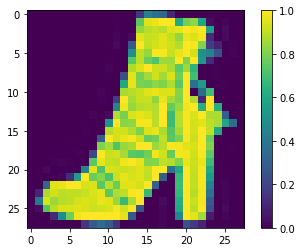

In [7]:
visualize_example(x_train[11])

## 2. Entrenamiento de una red neuronal simple

**Pregunta 2 **. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Dos hidden layers de tamaños 128 y 64, utilizando unidades **sigmoid**
* Optimizador **sgd**.
* Durante el entrenamiento, la red tiene que mostrar resultados de **loss** y **accuracy** por cada epoch.
* La red debe entrenar durante **20 epochs** y batch size de **64**.
* La última capa debe de ser una capa **softmax**.

Tu red tendría que ser capaz de superar fácilmente 60% de accuracy.

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
#Tenemos 10 clases que varian de 0 a 9 como hemos visto en los puntos anteriores.
num_clases=10

#Transformamos el formato de las imagenes de un vector bi-dimensional (de 28 por 28 pixeles) a un vector unidimensional (de 28*28 pixeles = 784 pixeles)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)



#Transformamos el vector de la variable y es categorico.
y_train = keras.utils.to_categorical(y_train, num_clases)
y_test = keras.utils.to_categorical(y_test, num_clases)






In [10]:
model = Sequential()
model.add(Dense(128,activation='sigmoid', input_shape=(784,)))
model.add(Dense(64,activation='sigmoid'))
model.add(Dense(num_clases,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
             
              metrics=['accuracy'])

In [12]:
batch_size= 64
epochs = 20
history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)


Epoch 1/20
938/938 [==============================] - 20s 19ms/step - loss: 2.1809 - accuracy: 0.3876 - val_loss: 2.0098 - val_accuracy: 0.5374
Epoch 2/20
938/938 [==============================] - 6s 6ms/step - loss: 1.7935 - accuracy: 0.5429 - val_loss: 1.5892 - val_accuracy: 0.5617
Epoch 3/20
938/938 [==============================] - 6s 6ms/step - loss: 1.4311 - accuracy: 0.6116 - val_loss: 1.2999 - val_accuracy: 0.6166
Epoch 4/20
938/938 [==============================] - 7s 7ms/step - loss: 1.1982 - accuracy: 0.6539 - val_loss: 1.1188 - val_accuracy: 0.6596
Epoch 5/20
938/938 [==============================] - 6s 6ms/step - loss: 1.0482 - accuracy: 0.6823 - val_loss: 0.9970 - val_accuracy: 0.6854
Epoch 6/20
938/938 [==============================] - 6s 7ms/step - loss: 0.9432 - accuracy: 0.7035 - val_loss: 0.9092 - val_accuracy: 0.7039
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.8653 - accuracy: 0.7183 - val_loss: 0.8437 - val_accuracy: 0.7134
Epoc

## 3. Evaluación del modelo en datos de test

Una vez hemos entrenado nuestro modelo, vamos a evaluarlo en los datos de test de Fashion MNIST.

**Pregunta 3.1 **. Utilizando el modelo recién entrenado, obtener la accuracy resultante en el dataset de test.

In [13]:
evaluation = model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1)  
evaluation

313/313 [==============================] - 1s 3ms/step - loss: 0.5820 - accuracy: 0.7871


[0.5820273160934448, 0.7871000170707703]

**Pregunta 3.2 **. Utilizando el método **predict** de Keras, realizar predicciones para los datos de test. Por cada predicción resultante, ¿qué significan los números que obtenemos al hacer predict? ¿Cómo podemos obtener el valor de la clase resultante? (recordar que estamos utilizando una capa softmax para clasificar).

In [14]:
#Ejemplo imagen 0
predictions = model.predict(x_test)
#Imprimimos las probabilidades de que pertenezca a cada clase.
print(predictions[0])
#Obtenemos el valor mayor para saber la clase resultante.
print(np.argmax(predictions[0]))




313/313 [==============================] - 1s 3ms/step
[4.0831823e-05 2.9106006e-05 3.7726457e-04 4.2516703e-04 1.2588150e-04
 2.0985165e-01 1.8616822e-04 2.2510168e-01 1.4942086e-02 5.4892015e-01]
9


Al ser la última capa de tipo softmax, el resultado es la probabilidad que la imagen que se esta tratando pertenezca a una clase especifica. La clase resultante se calcula obteniendo el valor máximo. En nuestro ejemplo el clase 9.